## The West Coast Heat Wave

In 2016 [Dr. Chelle Gentemann](https://cgentemann.github.io) and collaborators published a [paper](https://agupubs.onlinelibrary.wiley.com/doi/10.1002/2016GL071039) on the heat wave in the ocean off the California coast

The analysis was then performed using Matlab to process scientific data. To make Figure 1, here are the following steps:
- Download 4 TB of data from NASA PO.DAAC data archive via FTP
- Go through each day of data and subset to the West Coast Region to reduce size and save each subsetted day
- Go through 2002-2012 and create a daily climatology and save all 365 days of the climatology
- Go through each day of data and calculate the anomaly and save each day's anomaly

This whole process took about 1-2 month. 
Below we will do this using MUR SST data on AWS Open Data Program in a few minutes using Python.

### Question 6 [10 points]

Reproduce one of the images in Figure 3. 

### Data

In [24]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import fsspec
import matplotlib.pyplot as plt

import xarray as xr
xr.set_options(display_style="html")  # display dataset nicely

import warnings
warnings.simplefilter("ignore")  # filter some warning messages

# code features from https://scitools.org.uk/cartopy/docs/v0.14/matplotlib/feature_interface.html
crs = ccrs.PlateCarree()  # set projection

ds = xr.open_dataset("~/shared/climate-data/ds_hw.nc")

### Reproduce Figure 3b

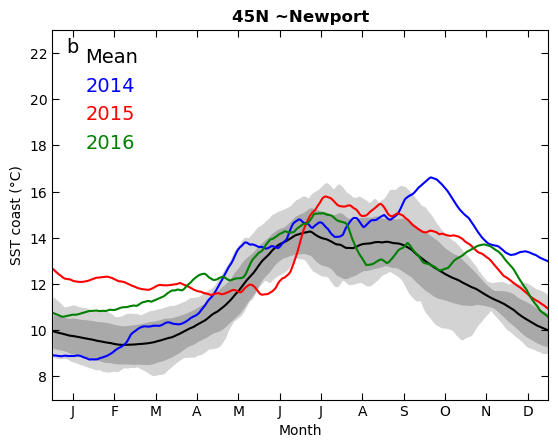

In [25]:
#create a new data variable called celsius: change analysed_set(kelvin) to celsius
ds['celsius'] = ds['analysed_sst'] - 273.15

#nearest-neighbor sampling and see the downscaling.ipynb to find longitude
new_ds = ds.sel(lat = 45, lon = -124.061, method = 'nearest')
new_ds = new_ds.celsius.rolling(time=30, center = True).mean()

fig, ax = plt.subplots()

#maximum and minimum values during 2002–2013
maximum = new_ds.sel(time=slice('2002', '2013')).groupby('time.dayofyear').max()
minimum = new_ds.sel(time=slice('2002', '2013')).groupby('time.dayofyear').min()

#compute mean and standard deviation 
mean = new_ds.sel(time=slice('2002', '2013')).groupby('time.dayofyear').mean()
std = new_ds.sel(time=slice('2002', '2013')).groupby('time.dayofyear').std()

#the envelope of ±1 SD around the mean during 2002–2013
plus = mean + std
minus = mean - std

#mean during 2002–2013 (black line)
plt.plot(mean.dayofyear.values, mean, color='black', label='Mean')

#values during 2014 (blue line)
year2014 = new_ds.sel(time = '2014').groupby('time.dayofyear').mean()
plt.plot(year2014.dayofyear.values, year2014, color = 'blue', label = '2014')

#values during 2015 (red line)
year2015 = new_ds.sel(time = '2015').groupby('time.dayofyear').mean()
plt.plot(year2015.dayofyear.values, year2015, color = 'red', label = '2015')

#values during 2016 (green line)
year2016 = new_ds.sel(time = '2016').groupby('time.dayofyear').mean()
plt.plot(year2016.dayofyear.values, year2016, color = 'green', label = '2016')

#plot light grey: the envelope of maximum and minimum values during 2002–2013
plt.fill_between(mean.dayofyear.values, minimum, maximum, color = 'lightgray')

#plot dark grey: the envelope of ±1 SD around the mean during 2002–2013
plt.fill_between(mean.dayofyear.values, minus, plus, color = 'darkgray')

#setting title bold
plt.title('45N ~Newport', fontweight='bold')

#change the appearance of ticks
plt.tick_params(direction="in", length=5, color="black", top = True, right = True)

#change x-axis labels
ax.set_xticks(np.arange(15, 360, 30))
ax.set_xticklabels(['J', 'F', 'M','A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D'])

#x-axis and y-axis
plt.ylabel('SST coast (°C)')
plt.xlabel('Month')

#Place a legend
plt.legend(loc = 'upper left', labelcolor = 'linecolor', fontsize = 14, handlelength = 0, frameon=False)
plt.text(10,22, "b", fontsize= 14, color="black")

plt.ylim(7, 23)
plt.xlim(0, 360)
plt.savefig('Q6')
plt.show()